In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
tobacco_df = pd.read_csv('Tobacco.csv')

In [ ]:
tobacco_df.columns

In [ ]:
tobacco_df['DataValueUnit'].value_counts()

In [ ]:
tobacco_df['Question'].value_counts()


In [ ]:
tobacco_df['LocationAbbr'].value_counts()

In [ ]:
#This code will show me if the YearStart column and the YearEnd column are all the same or not
same_years = (tobacco_df['YearStart'] == tobacco_df['YearEnd']).all()

if same_years:
    print("The 'YearStart' and 'YearEnd' columns have the same values in all rows.")
else:
    print("The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.")

In [ ]:
#need to put the YearStart in order
tobacco_df=tobacco_df.sort_values(by='YearEnd')
tobacco_df

In [ ]:
#This would turn 'YearEnd' into a date time by year but im sure why would need to do this will investigate more
#tobacco_df['YearEnd'] = pd.to_datetime(tobacco_df['YearEnd'], format='%Y')

#This code allows us to display value counts in order by year so we can see the order of years and how many rows of data each year contains
# use this code if you convert to datetime (year_end_counts = tobacco_df['YearEnd'].dt.year.value_counts().sort_index())
year_end_counts = tobacco_df['YearEnd'].value_counts().sort_index()
year_end_counts
#data summary for years: it looks like 2007 could be considered an outlier and possibly unusable for our analysis

In [ ]:
# chekcing the dtype of the column 'YearEnd', thus far int64 is our goal, but might check again if datetime becomes our targeted dtype
tobacco_df['YearEnd'].dtype


In [ ]:
#need to explore what kind of data we have in the DataValue comlumn to see what we can compare and use for a graph
#footnotes should give me an idea of what the numbers mean, check against documentation for further understanding
#need to understand if the questions datavalue is infering more or lesslikley hood of chronic desease
#Questions could be something that we could compare, need to check if the datavalues are comparable for all the same Questions
#what will groupby do if i groupby question: desired result it will group all same questions together to have comparable data amongst the same questions
#I might also need to groupby year: desired result all the same question whithin a particular year grouped together so I can show yearly changes with comparable data
#The LocationAbbr includes US, which has to be addressed
#we need to seperate or group by year,question, stratificationCategory1 and then stratification1 if not Overall


tobacco_df


In [ ]:
smokless_df =tobacco_df.loc[tobacco_df['Question'] == 'Current smokeless tobacco use among adults aged >= 18 years']
smokless_df

In [ ]:
#This groups the dataframe first by Year and then question, StratificationCat1, stratification, and finally groups by location
#It then applys a lambda function to make sure the years are in order.
#This currently does not address US in the locations with individual states
grouped_tobacco_df = tobacco_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(
    lambda x: x.sort_values(by = 'YearEnd')).reset_index(drop = True)

grouped_tobacco_df.head()

In [ ]:
#use this to look at a list of possible questions to choose from
grouped_tobacco_df['Question'].value_counts()

In [188]:
#The question is can we turn this into a function to apply to other csvs???

#creates a list with all the target valus in the Questions column
questions = grouped_tobacco_df['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = grouped_tobacco_df.loc[grouped_tobacco_df['Question'] == question]\
        .loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
        .loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']





In [ ]:
#renaming all the dataframes in the dfs{} and storing them in their respective dataframes
us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
us_overall_quit_tobacco_df = dfs['Quit attempts in the past year among current smokers']
us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
us_overall_smokeless_tobacco_adult_df = dfs['Current smokeless tobacco use among adults aged >= 18 years']
us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
us_overall_smokeless_youth_df=dfs['Current smokeless tobacco use among youth']
us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
us_overall_2nd_school_tobacco_free_policy=dfs['Secondary schools that have a comprehensive tobacco-free school policy in place']
us_overall_tobacco_revenue_fund_cdc_level = dfs['Percent tobacco revenue to fund at CDC recommended level']

In [ ]:
#loops through the dfs dictionary to extract the individual dfs by their 'Question' name and then plot them by yearend and datavalue
for df_name, df in dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearEnd'], df['DataValue'], label=df['DataValueUnit'].count())
    plt.xlabel('YearEnd')
    plt.ylabel('DataValue')
    plt.title(df_name.replace('_', ' ').title())
    plt.legend()
    plt.show()

Results: 'Percent tobacco revenue to fund at CDC recommended level' & 'Sale of cigarette packs' & 'Secondary schools that have a comprehensive tobacco-free school policy in place' dataframes don't have US or possibly Overall data causing them to be empty

dataframes with similar datavalue units that we could possibly plot on one graph:
    us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
    us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
#The top two have ranges 14 to 22 and the bottom has 15 to 21 could possibly combine these
    us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']

#range 4 to 9
    us_overall_smokeless_youth_df=dfs['Current smokeless tobacco use among youth']
#range 6 to 16
    us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']

#range 52 to 66
    us_overall_quit_tobacco_df = dfs['Quit attempts in the past year among current smokers']
#range 60 to 68
    us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
#range 50 to 62
    us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']




In [ ]:
#renaming all the dataframes in the dfs{} and storing them in their respective dataframes
us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
us_overall_quit_tobacco_df = dfs['Quit attempts in the past year among current smokers']
us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
us_overall_smokeless_tobacco_adult_df = dfs['Current smokeless tobacco use among adults aged >= 18 years']
us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
us_overall_smokeless_youth_df=dfs['Current smokeless tobacco use among youth']
us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
us_overall_2nd_school_tobacco_free_policy=dfs['Secondary schools that have a comprehensive tobacco-free school policy in place']
us_overall_tobacco_revenue_fund_cdc_level = dfs['Percent tobacco revenue to fund at CDC recommended level']

In [ ]:
#filter these by location and possibly Overall and maybe we could make a bar graph?
overall_sale_cigarette_packs_df=grouped_tobacco_df.loc[grouped_tobacco_df['Question'] == 'Sale of cigarette packs']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

overall_2nd_school_tobacco_free_policy_df = grouped_tobacco_df.loc[grouped_tobacco_df['Question'] == 'Secondary schools that have a comprehensive tobacco-free school policy in place']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

overall_tobacco_revenue_fund_cdc_level_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'] == 'Percent tobacco revenue to fund at CDC recommended level']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall'] 

#overall_sale_cigarette_packs_df
#overall_2nd_school_tobacco_free_policy_df
#overall_tobacco_revenue_fund_cdc_level_df

overall_sale_cigarette_packs_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Sale of Cigarette Packs')
overall_2nd_school_tobacco_free_policy_df.plot(kind ='bar',x = 'YearEnd', y = "DataValue", label = 'Secondary schools that have a comprehensive tobacco-free school policy in place')
overall_tobacco_revenue_fund_cdc_level_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Percent tobacco revenue to fund at CDC recommended level')
#plt.legend()
#plt.figure(figsize=(20,10))

In [ ]:
#lets choose a question with an easy to understand and compareble data value with the location being the US and the stratification being overall
# ill start by looking at questions and datavaluess
us_overall_smokingb4pregnancy_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'] == 'Cigarette smoking before pregnancy'].loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

us_overall_quit_tobacco_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'] == 'Quit attempts in the past year among current smokers'].loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']
#us_overall_smokingb4pregnancy_df
#us_overall_quit_tobacco_df.info()
#us_overall_quit_tobacco_df[['DataValue', 'DataValueUnit', 'DataValueType']]

In [ ]:
us_overall_smokingb4pregnancy_df.plot(x = 'YearEnd', y = "DataValue", label = 'Smoking before pregancy')
us_overall_quit_tobacco_df.plot(x = 'YearEnd', y = "DataValue", label = 'Attempts to quit tobacco')
plt.legend()

# plt.plot(us_overall_quit_tobacco_df['YearEnd'], us_overall_quit_tobacco_df['DataValue'], label = "Attempts to quit tobacco")
# plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
# plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('Tobacco')
# plt.legend()

In [ ]:
plt.plot(us_overall_quit_tobacco_df['YearEnd'], us_overall_quit_tobacco_df['DataValue'], label = "Attempts to quit tobacco")
plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('Tobacco')
# plt.legend()

In [ ]:
tobacco_df['Question'].value_counts()

In [ ]:
#we first filtered the dataframe to only include 2 questions as well as location = US, stratification = Overall

question_year_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless tobacco use among adults aged >= 18 years'])].loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

#put each question into its own list
# Create new columns based on the values in the 'Initial_Column'
question_year_df['Question1'] = np.where(question_year_df['Question'] =='Current smoking among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df['Question2'] = np.where(question_year_df['Question'] =='Current smokeless tobacco use among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df.head()


In [ ]:
question_year_df.columns


In [ ]:
question_year_filter = question_year_df[['YearEnd','Question1','Question2']]
#question_year_filter.set_index("YearEnd")
question_year_filter.head()

In [ ]:
#ploting 2 question on the same graph with YearEnd as the x axis
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
plt.xlabel('Year')
plt.ylabel('Question')
plt.title('Tobacco')
plt.legend()

C:\Users\tyzwh\AppData\Local\Temp\ipykernel_32328\2962594156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)


<Axes: >

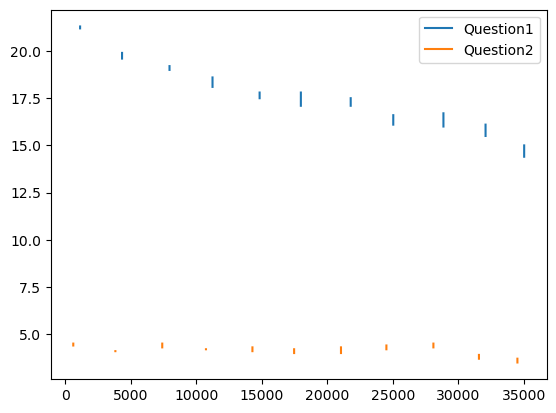

In [148]:
#df['column_name'] = df['column_name'].astype(int)
question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)

question_year_filter[['Question1', 'Question2']].plot()



#question_year_filter.plot(y = 'Question1', 'Question2')


In [ ]:
us_overall_df =grouped_tobacco_df.loc[grouped_tobacco_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless tobacco use among adults aged >= 18 years'])].loc[grouped_tobacco_df['LocationAbbr'] == 'US']\
.loc[grouped_tobacco_df['StratificationCategory1'] == 'Overall']

us_overall_df.tail()


<Axes: title={'center': 'Question'}, xlabel='YearEnd', ylabel='DataValue'>

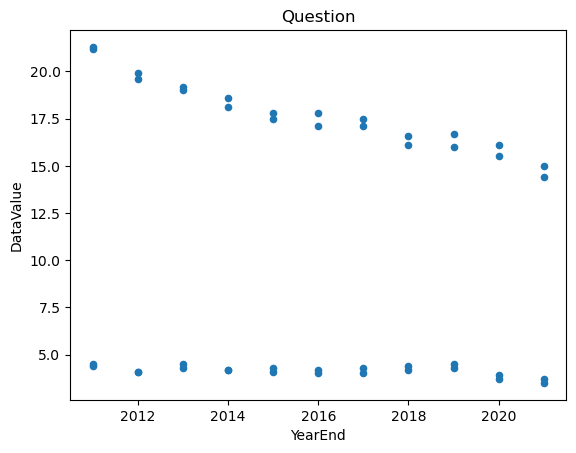

In [102]:
us_overall_df.plot(kind = 'scatter', x='YearEnd', y= 'DataValue', title ='Question' )